In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [75]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


In [76]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [77]:
# features are those that are continuous
days_significant_columns = [
    'PreopEGFRMDRD',
    'Preoptransfusionwithin30days',
    'Intraop',
    'Postopwithin30days',
    'Transfusionintraandpostop'
]

days_cares = cares[days_significant_columns + ['DaysbetweenDeathandoperation']]

In [78]:
days_cares = days_cares.dropna(how='any')

In [79]:
days_cares.shape

(5373, 6)

In [80]:
days_cares.head()

,PreopEGFRMDRD,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,DaysbetweenDeathandoperation
4,98.651255,0.0,0.0,0.0,0.0,59.0
45,95.849232,0.0,0.0,0.0,0.0,1063.0
103,102.832998,0.0,0.0,0.0,0.0,793.0
107,99.129633,0.0,0.0,0.0,0.0,17.0
108,107.520574,0.0,0.0,0.0,0.0,433.0


Check if features need rescaling

In [81]:
days_cares['PreopEGFRMDRD'].value_counts()

PreopEGFRMDRD
112.382587    6
96.448454     5
103.500168    5
83.071515     4
108.871038    4
             ..
122.038330    1
32.114377     1
109.175965    1
269.023482    1
177.230873    1
Name: count, Length: 4444, dtype: int64

Check deeper for PreopEGFRMDRD

In [82]:
days_cares['PreopEGFRMDRD'].describe()

count    5373.000000
mean       78.585733
std        52.249525
min         2.541026
25%        39.380409
50%        76.907395
75%       107.464507
max       588.466578
Name: PreopEGFRMDRD, dtype: float64

In [83]:
days_cares['Preoptransfusionwithin30days'].value_counts()

Preoptransfusionwithin30days
0.0     4773
1.0      272
2.0      146
3.0       71
4.0       32
5.0       22
7.0       17
8.0       12
6.0       12
11.0       4
14.0       3
10.0       2
9.0        2
13.0       2
17.0       1
12.0       1
21.0       1
Name: count, dtype: int64

In [84]:
days_cares['Intraop'].value_counts()

Intraop
0.0    4180
1.0    1193
Name: count, dtype: int64

In [85]:
days_cares['Postopwithin30days'].value_counts()

Postopwithin30days
0.0     5029
1.0      192
2.0       67
3.0       32
5.0       14
4.0       12
6.0        8
7.0        8
8.0        4
9.0        3
15.0       1
12.0       1
23.0       1
10.0       1
Name: count, dtype: int64

In [86]:
days_cares['Transfusionintraandpostop'].value_counts()

Transfusionintraandpostop
0.0     4176
1.0      855
2.0      192
3.0       65
4.0       32
6.0       14
5.0       12
7.0        8
8.0        8
9.0        4
10.0       3
16.0       1
13.0       1
24.0       1
11.0       1
Name: count, dtype: int64

From the above, PreopEGFRMDRD needs to be normalized as the range is significantly different from the rest

In [87]:
#use domain scaler to fit into range of other features since they share a common range from 0 to 24

days_cares['PreopEGFRMDRD'] = (days_cares['PreopEGFRMDRD']-0)/(24-0)
print('DomainScaler:\n{}'.format(days_cares['PreopEGFRMDRD'].describe()))

DomainScaler:
count    5373.000000
mean        3.274406
std         2.177064
min         0.105876
25%         1.640850
50%         3.204475
75%         4.477688
max        24.519441
Name: PreopEGFRMDRD, dtype: float64


Now let's look at dependent variable

In [88]:
days_cares["DaysbetweenDeathandoperation"].isna().value_counts()

DaysbetweenDeathandoperation
False    5373
Name: count, dtype: int64

In [89]:
days_cares['DaysbetweenDeathandoperation'].value_counts()

DaysbetweenDeathandoperation
1.0       32
7.0       26
4.0       24
6.0       23
13.0      22
          ..
1393.0     1
1551.0     1
1309.0     1
965.0      1
1315.0     1
Name: count, Length: 1400, dtype: int64

In [90]:
days_cares['DaysbetweenDeathandoperation'].describe()

count    5373.000000
mean      476.621441
std       424.329110
min         0.000000
25%       119.000000
50%       352.000000
75%       748.000000
max      1783.000000
Name: DaysbetweenDeathandoperation, dtype: float64

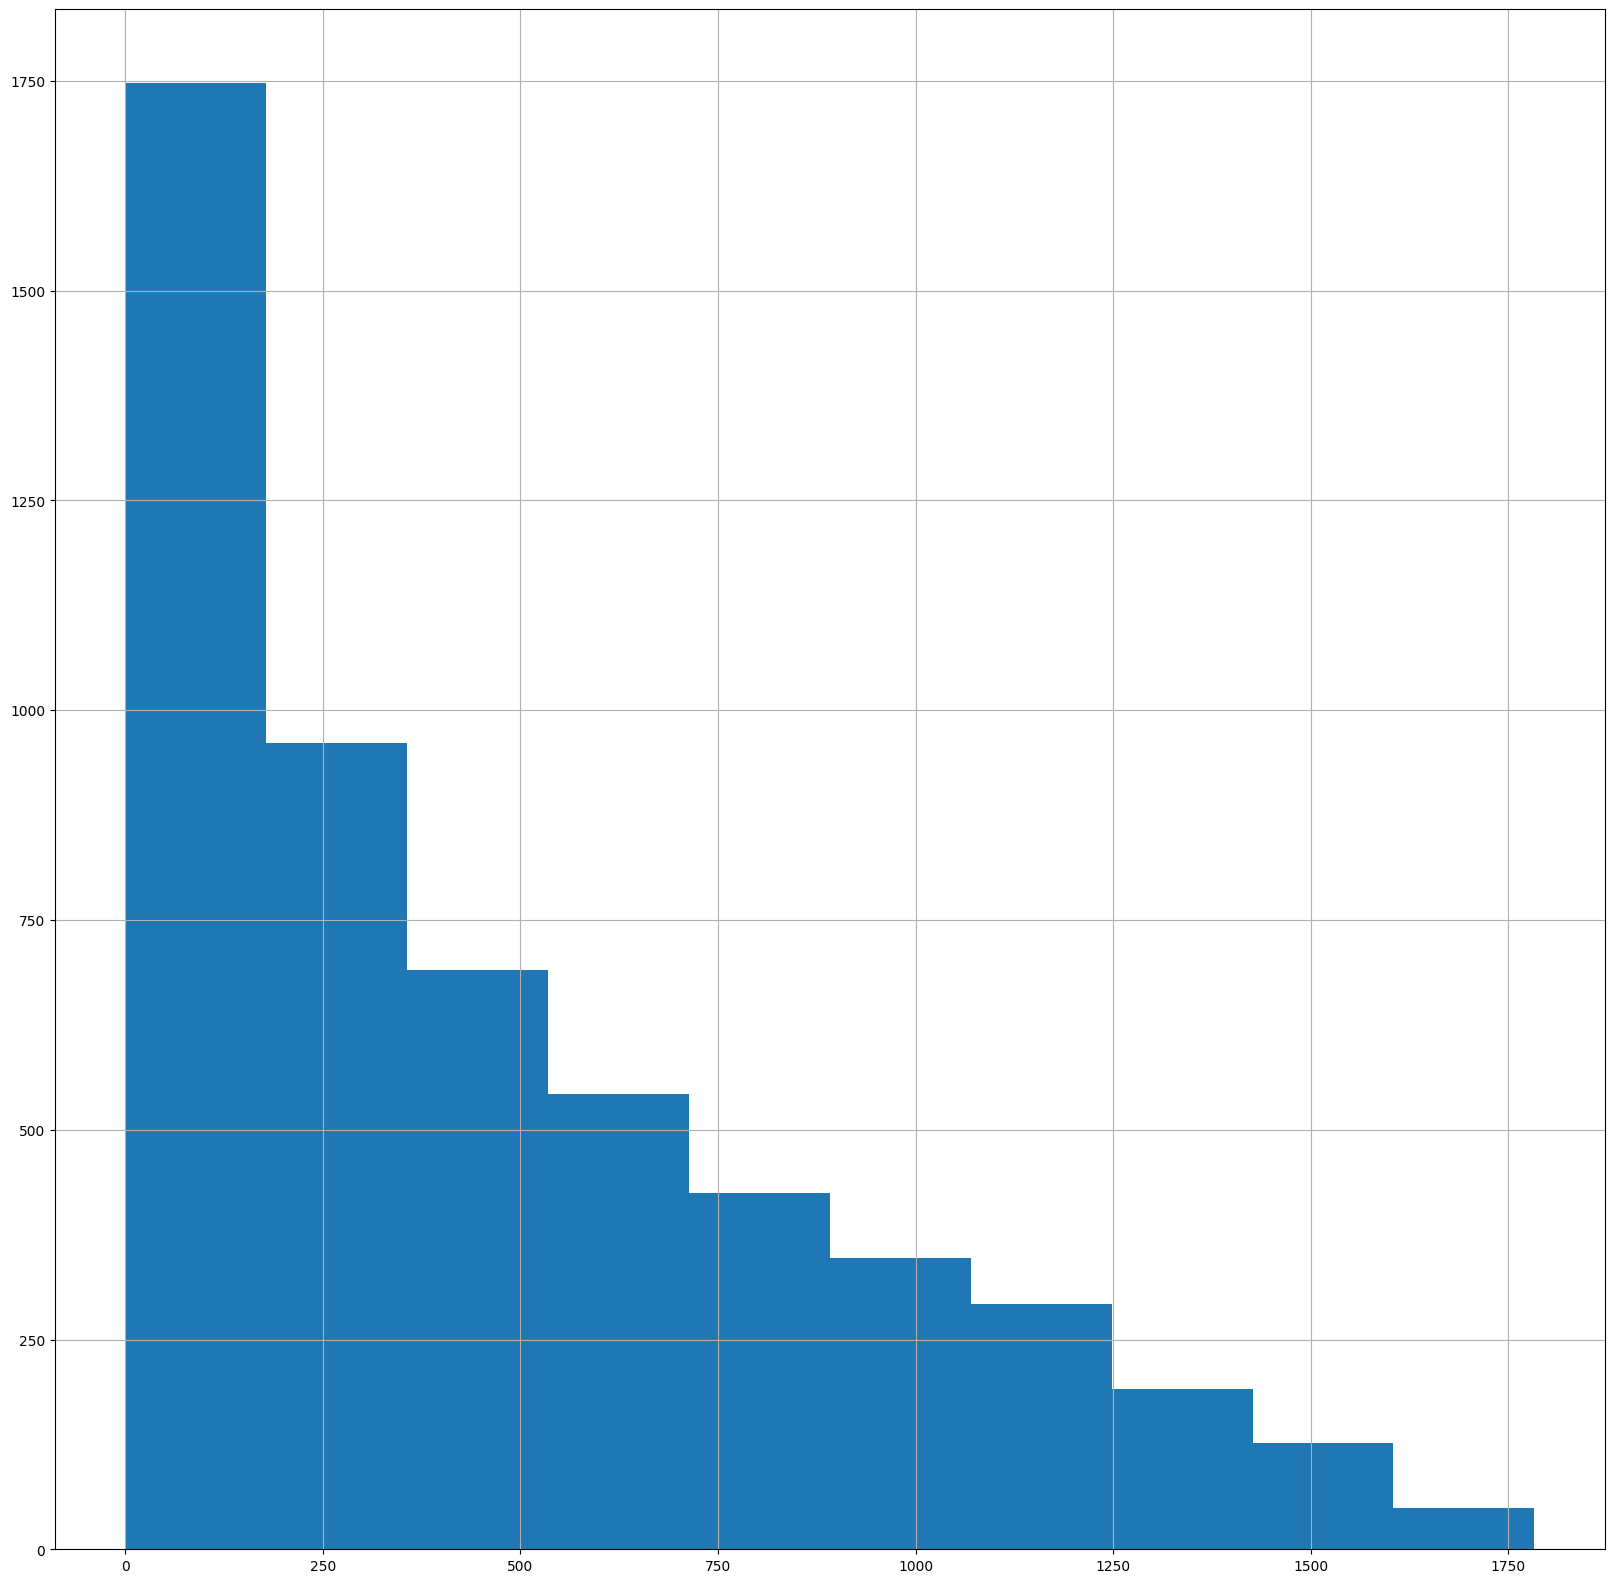

In [91]:
p = days_cares["DaysbetweenDeathandoperation"].hist(figsize=(20,20))

Dependent variable is highly skewed, let's try to normalize it

In [92]:
days_cares['DaysbetweenDeathandoperation'] = (days_cares['DaysbetweenDeathandoperation']-0)/(24-0)
print('DomainScaler:\n{}'.format(days_cares['DaysbetweenDeathandoperation'].describe()))

DomainScaler:
count    5373.000000
mean       19.859227
std        17.680380
min         0.000000
25%         4.958333
50%        14.666667
75%        31.166667
max        74.291667
Name: DaysbetweenDeathandoperation, dtype: float64


# Simple Modeling (lin reg, DT reg, ridge, lasso)

In [94]:
RANDOM_SEED = 623

In [95]:
np.random.seed(RANDOM_SEED)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import tree, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [98]:
X = days_cares.drop('DaysbetweenDeathandoperation', axis=1)
y = days_cares['DaysbetweenDeathandoperation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [99]:
# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3761, 5)
Shape of y_train: (3761,)
Shape of X_test: (1612, 5)
Shape of y_test: (1612,)


In [100]:
# Feature engineer the generated data X by adding polynomial features of degree N
# Initialise a list of degrees 
list_deg = [1, 3, 6, 9]
# Initial number of predicted values
num_points = 1612
# Initialise the 2D array to store the predicted values
degree_predictions = np.zeros((len(list_deg), num_points))

# Initialise lists to store MSE and R² values for each degree
mae_list = []
mse_list = []
r2_list = []

for i, N in enumerate(list_deg):
    # Initialise the polynomial feature transformer 
    poly = PolynomialFeatures(degree=N)
    
    # Fits and transforms the input train data and creates new features of degree N
    X_train_ = poly.fit_transform(X_train)
    
    # Instantiate a linear regressor
    linreg = LinearRegression()
    
    # Train the linear regressor with X_train data with polynomial features added of degree N
    linreg.fit(X_train_, y_train)
    
    # Transform the test data to include polynomial features of the same degree
    X_test_ = poly.fit_transform(X_test)
    
    # Store the predicted values on the ith row
    y_pred = linreg.predict(X_test_)
    degree_predictions[i, :] = y_pred
    
    # Calculate and store the MSE and R² values
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)
    
    # Print MSE and R² for the current degree
    print(f"Degree {N}: MAE = {mae:.4f}, Degree {N}: MSE = {mse:.4f}, R² = {r2:.4f}")

# degree_predictions now contains the predictions for each degree of polynomial features
degree_predictions

Degree 1: MAE = 14.2201, Degree 1: MSE = 291.4899, R² = 0.0159
Degree 3: MAE = 229331239.7274, Degree 3: MSE = 74718171965545938944.0000, R² = -252267241273885472.0000
Degree 6: MAE = 1013587.0232, Degree 6: MSE = 1444857494220222.5000, R² = -4878200369634.7598
Degree 9: MAE = 4764874.2909, Degree 9: MSE = 11596691137139596.0000, R² = -39153330496635.2734


array([[  12.97343517,   22.99915803,   15.98053123, ...,   23.00115014,
          22.82429422,   14.71448099],
       [  16.2539109 ,   21.5296485 ,   17.56454933, ...,   21.52391868,
          21.98762622,   11.96997536],
       [  31.7762059 ,   21.14751424,   15.6020518 , ...,   21.14864011,
          21.16978267,    8.50295902],
       [-213.9034765 ,   19.56262883,   14.64366998, ...,   19.58080931,
          18.95652501,   79.51184281]])

From polynomial regression, seems like degree 1 (lin reg) performs the best

In [101]:
# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict using the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation results
    print(f"\n{name} Evaluation:")
    print(f"Intercept: {model.intercept_}" if hasattr(model, 'intercept_') else "")
    print(f"Coefficient: {model.coef_}" if hasattr(model, 'coef_') else "")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")


Linear Regression Evaluation:
Intercept: 23.37263694264176
Coefficient: [-0.59789983 -1.46568417 -2.09800728  0.62859566 -1.46941161]
Mean Absolute Error (MAE): 14.22
Mean Squared Error (MSE): 291.49
Root Mean Squared Error (RMSE): 17.07
R-squared (R²): 0.02

Ridge Regression Evaluation:
Intercept: 23.372564045682285
Coefficient: [-0.59789941 -1.46569774 -2.09771336  0.62840367 -1.46930969]
Mean Absolute Error (MAE): 14.22
Mean Squared Error (MSE): 291.49
Root Mean Squared Error (RMSE): 17.07
R-squared (R²): 0.02

Lasso Regression Evaluation:
Intercept: 23.19028586139803
Coefficient: [-0.58117889 -1.4665218  -1.96439818 -0.         -0.95540209]
Mean Absolute Error (MAE): 14.22
Mean Squared Error (MSE): 291.24
Root Mean Squared Error (RMSE): 17.07
R-squared (R²): 0.02

Decision Tree Regression Evaluation:


Mean Absolute Error (MAE): 18.94
Mean Squared Error (MSE): 599.43
Root Mean Squared Error (RMSE): 24.48
R-squared (R²): -1.02
